<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run). 

## Case Study: Fashion Product Catalogue Analysis

This notebook demonstrates how to use VLM Run to analyze fashion product images and extract structured information including:
- Detailed product descriptions
- Product categories
- Target gender
- Seasonal classification

We'll use a sample dataset from the Fashion Product Images dataset to showcase VLM Run's retail product analysis capabilities.

### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.

## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet
! pip install vlmrun-hub --upgrade --quiet

In [2]:
! pip install datasets --quiet

In [3]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://dev.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

 ········


Let's initialize the VLM Run Client

In [4]:
from vlmrun.client import VLMRun

vlm_client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)

In [5]:
from datasets import load_dataset
import logging

def load_fashion_dataset(sample_size="1%"):
    try:
        print(f"Loading {sample_size} of fashion dataset...")
        ds = load_dataset("ashraq/fashion-product-images-small", 
                         split=f"train[:{sample_size}]")
        print(f"Loaded {len(ds)} images successfully")
        return ds
    except Exception as e:
        logging.error(f"Failed to load dataset: {str(e)}")
        raise

ds = load_fashion_dataset("1%")

/Users/kaushikbokka/apps/vlm-run/vlmrun-cookbook/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading 1% of fashion dataset...
Loaded 441 images successfully


### Let's define an utility function for visualization

In [6]:
from IPython.display import HTML, display
import io
import base64

def display_fashion_results(dataset, start_idx=0, num_images=20):
    html_content = """
    <style>
        .results-grid {
            display: grid;
            grid-template-columns: repeat(auto-fill, minmax(300px, 1fr));
            gap: 20px;
            padding: 20px;
        }
        .result-card {
            border: 1px solid #ddd;
            border-radius: 8px;
            padding: 15px;
            background: white;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
            transition: transform 0.2s ease;
        }
        .result-card:hover {
            transform: translateY(-2px);
            box-shadow: 0 4px 8px rgba(0,0,0,0.1);
        }
        .result-card img {
            width: 100%;
            height: 300px;
            object-fit: contain;
            border-radius: 4px;
            margin-bottom: 10px;
            background: #f8f9fa;
        }
        .result-info {
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, sans-serif;
        }
        .result-info p {
            margin: 8px 0;
            color: #333;
            line-height: 1.5;
        }
        .tags {
            display: flex;
            flex-wrap: wrap;
            gap: 6px;
            margin-top: 12px;
        }
        .tag {
            padding: 4px 10px;
            border-radius: 12px;
            font-size: 12px;
            background: #f0f0f0;
            color: #666;
            font-weight: 500;
        }
    </style>
    <div class="results-grid">
    """
    
    for i in range(start_idx, start_idx + num_images):
        image = dataset["image"][i]
        
        # Convert PIL image to base64
        buffered = io.BytesIO()
        image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()
        
        # Get prediction from VLM Run
        response = vlm_client.image.generate(
            images=[image],
            domain="retail.product-catalog"
        )
        
        # Add card for this result
        html_content += f"""
        <div class="result-card">
            <img src="data:image/png;base64,{img_str}" alt="Fashion item">
            <div class="result-info">
                <p>{response.response.description}</p>
                <div class="tags">
                    <span class="tag">{response.response.category}</span>
                    <span class="tag">{response.response.season}</span>
                    <span class="tag">{response.response.gender}</span>
                </div>
            </div>
        </div>
        """
    
    html_content += "</div>"
    display(HTML(html_content))


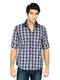
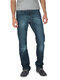
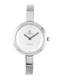
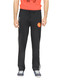
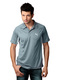
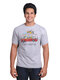
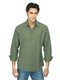
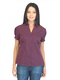
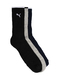
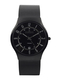
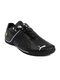
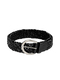
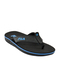
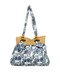
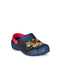
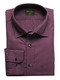
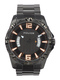
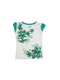
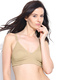
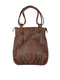

In [7]:
display_fashion_results(ds, start_idx=0, num_images=20)

## Additional Resources
- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)
- [Fashion Dataset](https://huggingface.co/datasets/ashraq/fashion-product-images-small)